In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import image

from sklearn.model_selection import train_test_split

In [2]:
moneda = 'BTC-USD'
#Ventana de tiempo: 1 para diario, 7 para semanal, 30 para mensual
window_MA = 1

#Carga de imagenes generadas
loaded_images = pd.DataFrame(columns = ['IMG','Cluster'])
img = []
label = []
for filename in listdir('/Users/sacbe/Documents/Tesis/Algoritmos/IMG/'+ str(moneda) +'_'+ str(window_MA)):
    if filename == '.DS_Store':
        continue
    img_data = image.imread('/Users/sacbe/Documents/Tesis/Algoritmos/IMG/'+str(moneda)+'_'+str(window_MA)+'/'+filename)
    img.append(img_data)
    label.append(filename[-5])

    
loaded_images['IMG'] = img
loaded_images['Cluster'] = label

In [3]:
train, test = train_test_split(loaded_images, test_size=0.2)

train_img0 = np.asarray(train['IMG'])
test_img0 = np.asarray(test['IMG'])

train_img = np.arange(1024).reshape((32, 32))
test_img = np.arange(1024).reshape((32, 32))

for array in train_img0:
    train_img = np.concatenate([train_img, array])

for array in test_img0:
    test_img = np.concatenate([test_img, array])

train_img = np.delete(train_img, np.arange(32), axis=0)
test_img = np.delete(test_img, np.arange(32), axis=0)

train_img = train_img.reshape(-1,32,32,1)
test_img = test_img.reshape(-1,32,32,1)

In [4]:
s = pd.Series(np.arange(len(train)))
train = train.set_index(s)
j = 0

for i in train['Cluster']:
    if(i == '5' or i == '0' or i == '8'):
        train['Cluster'][j] = 2 #Vende
    elif(i == '2' or i == '7' or i == '9' or i == '4'):
        train['Cluster'][j] = 1 #Incertidumbre
    else:
        train['Cluster'][j] = 0 #Compra
    j = j + 1
        

s = pd.Series(np.arange(len(test)))
test = test.set_index(s)

j = 0
for i in test['Cluster']:
    if(i == '5' or i == '0' or i == '8'):
        test['Cluster'][j] = 2 #Vende
    elif(i == '2' or i == '7' or i == '9' or i == '4'):
        test['Cluster'][j] = 1 #Incertidumbre
    else:
        test['Cluster'][j] = 0 #Compra
    j += 1


In [5]:
train_cluster = np.asarray(train['Cluster']).astype('uint8').reshape(-1,1)
test_cluster = np.asarray(test['Cluster']).astype('uint8').reshape(-1,1)

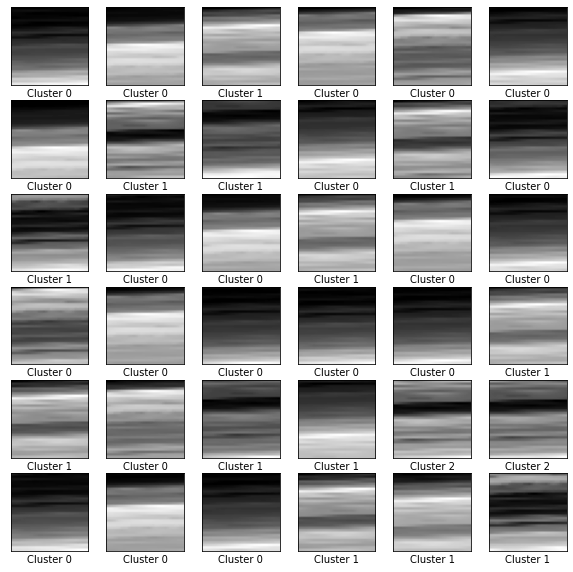

In [6]:
# Presentación de magenes generadas. 

#class_names = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9']
class_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i].reshape(32,32), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_cluster[i][0]])
plt.show()

In [24]:
#Creación y configuración del modelo.

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(2560, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)            

In [26]:
%%time
#Entrenamiento
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img, train_cluster, epochs=50,
                    validation_data=(test_img, test_cluster))

Train on 616 samples, validate on 154 samples
Epoch 1/50
616/616 [==============================] - 4s 7ms/sample - loss: 0.9182 - accuracy: 0.4951 - val_loss: 1.3370 - val_accuracy: 0.5130
Epoch 2/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.9562 - accuracy: 0.5357 - val_loss: 0.8209 - val_accuracy: 0.5779
Epoch 3/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.7283 - accuracy: 0.6169 - val_loss: 0.6428 - val_accuracy: 0.5909
Epoch 4/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.4715 - accuracy: 0.7873 - val_loss: 0.2866 - val_accuracy: 0.9091
Epoch 5/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.2165 - accuracy: 0.9302 - val_loss: 0.1497 - val_accuracy: 0.9545
Epoch 6/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.1436 - accuracy: 0.9464 - val_loss: 0.1133 - val_accuracy: 0.9740
Epoch 7/50
616/616 [==============================] - 3s 5ms/sample - loss: 0.1261 - accur

154/1 - 0s - loss: 0.0220 - accuracy: 0.9805
0.9805195


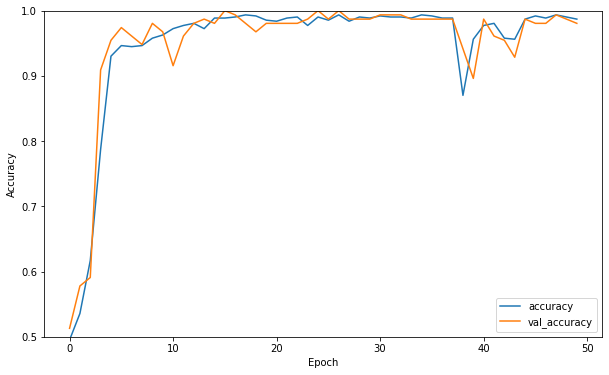

In [28]:
#Resultados del entrenamiento y guardado del modelo.


plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_img,  test_cluster, verbose=2)
print(test_acc)
#model.save('CNN_'+str(moneda)+'_'+str(window_MA)+'_Sum.h5')